In [1]:
import pandas as pd
import time
import numpy as np
np.seterr(invalid='ignore')
import nbimporter
from PPP import PPP
from defense_PPP import defense_PPP
from court import create_court
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
import plotly.graph_objects as go
import plotly.offline as pyo
pd.options.display.max_columns = 999

In [13]:
file_path = 'Nuggets/data/Offense/Team.json'
defense_path = 'Nuggets/data/Defense/Team.json'

opp_off_path = 'Opponent/Wolves/Offense/Team.json'

with open (file_path, 'r') as f:
    file = json.load(f)
    
with open (defense_path, 'r') as d:
    defense_file = json.load(d)
    
with open (opp_off_path, 'r') as o:
    opp_off_file = json.load(o)
    
print(file.keys())

dict_keys(['ovr_data', 'SMZ2', '3ptZ2', 'Rim', 'SMZ3', '3ptZ1', '3ptZ3', 'SMZ1 ', '3ptZ4', 'LMZ3', '3ptZ5', 'LMZ1', 'LMZ2'])


In [26]:
data_PPP = file['ovr_data']['data']
data_PPP = pd.DataFrame(data_PPP).transpose()
data_PPP = PPP(data_PPP)
data_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.17,15.9,2,43.7,0.17,66.21,3.5,13,53.8,3.31,5,60.0,4.0,0.83,12.1,2,56.3,0.0,50.0,3.5,8,33.3,3.33,4,50.0,3.75,1.61,26.6,0,43.7,0.38,84.46,3.5,8,71.4,3.29,1,100.0,3.75
PNR Screener,1.5,5.5,2,0.0,0.75,112.7,3.0,3,100.0,2.33,1,100.0,5.0,1.5,7.4,2,100.0,0.75,112.7,3.0,6,100.0,2.33,1,100.0,5.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,5.0
DHO Ball Handler,1.67,4.5,0,16.7,0.0,83.33,3.5,5,100.0,3.4,1,0.0,4.0,1.6,5.1,0,83.3,0.0,80.0,3.8,4,100.0,3.75,1,0.0,4.0,2.0,2.9,0,16.7,0.0,100.0,2.0,1,100.0,2.0,0,N/A,4.0
DHO Screener,2.0,0.7,0,100.0,0.0,100.0,3.0,1,100.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,2.0,2.9,0,100.0,0.0,100.0,3.0,1,100.0,3.0,0,N/A,N/A
ISOLATION,1.08,23.5,5,26.4,0.35,71.19,2.74,16,62.5,2.31,7,57.1,3.71,0.86,23.4,5,73.6,0.31,60.83,2.44,19,57.1,2.29,4,50.0,3.5,1.68,23.8,0,26.4,0.43,94.09,3.43,3,100.0,2.5,5,60.0,3.5
TRANSITION,0.85,18.5,2,43.9,0.19,47.99,3.67,11,72.7,3.55,10,10.0,3.8,0.65,14.0,2,56.1,0.18,39.34,3.36,8,57.1,3.14,5,0.0,3.75,1.1,31.1,0,43.9,0.2,57.47,4.0,4,100.0,4.25,6,16.7,3.75
Attacking Closeouts,1.44,7.8,0,19.2,0.1,75.0,3.0,9,66.7,2.78,1,100.0,5.0,1.18,8.5,0,80.8,0.12,62.5,2.75,8,62.5,2.75,0,N/A,N/A,2.5,5.7,0,19.2,0.0,125.0,4.0,1,100.0,3.0,1,100.0,N/A
Catch & Shoot,1.07,10.4,0,0.0,0.0,53.57,3.93,0,N/A,N/A,14,35.7,3.93,1.07,14.1,0,100.0,0.0,53.57,3.93,0,N/A,N/A,14,35.7,3.93,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.93
Off Ball Screens,1.0,3.0,0,25.0,0.0,50.0,4.0,2,100.0,4.0,2,0.0,4.0,0.67,3.0,0,75.0,0.0,33.33,3.67,1,100.0,3.0,2,0.0,4.0,2.0,2.9,0,25.0,0.0,100.0,5.0,1,100.0,5.0,0,N/A,4.0
Cutting,1.72,7.4,1,10.1,0.25,100.71,3.88,8,100.0,3.88,0,N/A,N/A,1.69,9.0,1,89.9,0.29,100.81,3.86,8,100.0,3.86,0,N/A,N/A,2.0,2.9,0,10.1,0.0,100.0,4.0,1,100.0,4.0,0,N/A,N/A


NUGGETS OFFENSE SHOT CHART
--------------------------
Total PPP: 1.21
Shooting TS%: 64.13 on 3.44 SQ
3pt FG %: 32.1 on 3.89 SQ

Total FTR: 0.18

Rim PPP: 1.49
Rim TS%: 86.65 on 2.91 SQ


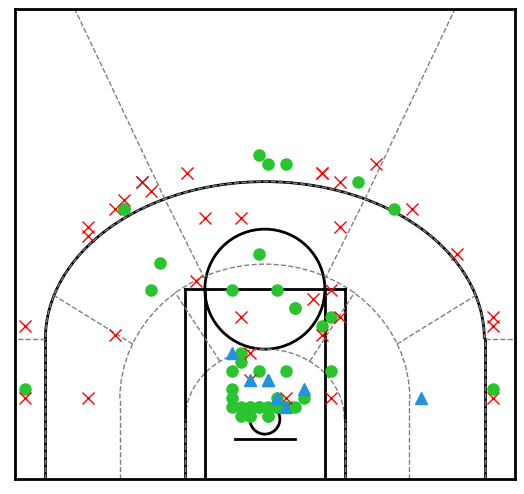

In [45]:
shots = file['ovr_data']['shooting_locations']

off_PPP = data_PPP['Total PPP']['TOTAL']
off_total_SQ = data_PPP['Total SQ']['TOTAL']
off_shoot_TS = data_PPP['Shooting TS%']['TOTAL']
off_3pt_fg_per = data_PPP['Shooting 3pt FG%']['TOTAL']
off_3pt_SQ = data_PPP['Shooting 3pt SQ']['TOTAL']

off_FTR = data_PPP['Total FTR']['TOTAL']

off_rim_PPP = rim_PPP['Shooting PPP']['TOTAL']
off_rim_TS = rim_PPP['Shooting TS%']['TOTAL']
off_rim_SQ = rim_PPP['Shooting SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
nugg_off_fig = plt.figure(figsize=(5, 4.7))
nugg_off_ax = nugg_off_fig.add_axes([0, 0, 1, 1])
nugg_off_ax = create_court(nugg_off_ax, 'black')


for shot in shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        nugg_off_ax.plot(x,y, marker='o', color='#29c42e', markersize=8)
    if res == 0:
        nugg_off_ax.plot(x,y, marker='x', color='red', markersize=9)
    if res == 11: # Free Throws
        nugg_off_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
        '''
    if res == 20: # Turnovers
        nugg_off_ax.plot(x,y, marker='D', color='grey', markersize=6)
        '''
    if res == 30: # And-1
        nugg_off_ax.plot(x,y, marker='^', color='#2393de', markersize=9)

print(f'NUGGETS OFFENSE SHOT CHART')
print('--------------------------')
print(f'Total PPP: {off_PPP}')
print(f'Shooting TS%: {off_shoot_TS} on {off_total_SQ} SQ')
print(f'3pt FG %: {off_3pt_fg_per} on {off_3pt_SQ} SQ\n')

print(f'Total FTR: {off_FTR}\n')

print(f'Rim PPP: {off_rim_PPP}')
print(f'Rim TS%: {off_rim_TS} on {off_rim_SQ} SQ')
        
plt.show()

In [22]:
opp_PPP = opp_off_file['ovr_data']['data']
opp_PPP = pd.DataFrame(opp_PPP).transpose()
opp_PPP = PPP(opp_PPP)
opp_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.97,19.8,2,31.6,0.22,53.14,3.72,10,40.0,3.4,8,37.5,4.12,1.08,16.4,2,68.4,0.17,62.11,3.5,9,50.0,3.5,5,50.0,3.5,0.73,36.2,0,31.6,0.33,36.34,4.17,2,0.0,3.0,4,25.0,3.5
PNR Screener,0.29,6.3,2,0.0,0.5,20.49,4.0,2,0.0,3.0,2,0.0,5.0,0.29,7.6,2,100.0,0.5,20.49,4.0,4,0.0,3.0,2,0.0,5.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,5.0
DHO Ball Handler,1.0,1.8,0,0.0,0.0,50.0,1.0,2,50.0,1.0,0,N/A,N/A,1.0,2.2,0,100.0,0.0,50.0,1.0,2,50.0,1.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Screener,0.0,0.9,0,100.0,0.0,0.0,1.0,1,0.0,1.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,0.0,5.3,0,100.0,0.0,0.0,1.0,1,0.0,1.0,0,N/A,N/A
ISOLATION,0.85,29.8,5,21.4,0.15,50.43,2.5,21,42.9,2.14,5,40.0,4.0,0.89,28.3,5,78.6,0.21,55.39,2.11,23,44.4,2.06,2,100.0,3.0,0.71,36.8,0,21.4,0.0,35.71,3.57,3,33.3,2.67,4,25.0,3.0
TRANSITION,1.54,13.6,3,22.2,1.12,96.15,3.12,6,66.7,2.67,2,100.0,4.5,1.29,12.8,3,77.8,1.0,86.81,3.33,8,60.0,3.2,3,100.0,4.0,2.41,17.5,0,22.2,1.5,120.48,2.5,2,100.0,0.0,1,100.0,4.0
Attacking Closeouts,1.3,9.8,0,9.3,0.44,65.06,3.22,8,62.5,3.12,1,0.0,4.0,1.43,10.7,0,90.7,0.5,71.72,3.25,8,71.4,3.14,1,0.0,4.0,0.0,5.3,0,9.3,0.0,0.0,3.0,1,0.0,3.0,0,N/A,4.0
Catch & Shoot,1.33,8.2,0,0.0,0.0,66.67,4.33,0,N/A,N/A,9,44.4,4.33,1.33,9.9,0,100.0,0.0,66.67,4.33,0,N/A,N/A,9,44.4,4.33,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.33
Off Ball Screens,1.33,2.7,0,0.0,0.0,66.67,2.33,3,66.7,2.33,0,N/A,N/A,1.33,3.3,0,100.0,0.0,66.67,2.33,3,66.7,2.33,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,1.29,4.9,0,0.0,0.2,64.34,2.2,5,60.0,2.2,0,N/A,N/A,1.29,6.0,0,100.0,0.2,64.34,2.2,5,60.0,2.2,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


OPPONENT OFFENSE SHOT CHART
--------------------------
Total PPP: 1.06
True Shooting %: 62.37 on 3.06 SQ
3pt FG %: 44.4 on 4.11 SQ

Total FTR: 0.27

Rim PPP: 1.16
Rim TS%: 61.66 on 2.37 SQ


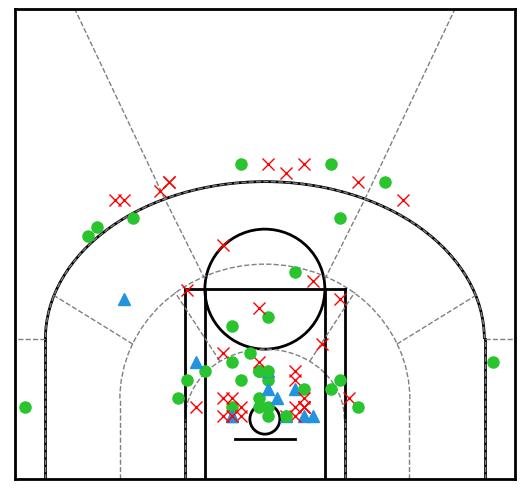

In [53]:
opp_shots = opp_off_file['ovr_data']['shooting_locations']

opp_off_PPP = opp_PPP['Total PPP']['TOTAL']
opp_total_SQ = opp_PPP['Total SQ']['TOTAL']
opp_shoot_TS = opp_PPP['Shooting TS%']['TOTAL']
opp_3pt_fg_per = opp_PPP['Shooting 3pt FG%']['TOTAL']
opp_3pt_SQ = opp_PPP['Shooting 3pt SQ']['TOTAL']

opp_FTR = opp_PPP['Total FTR']['TOTAL']

opp_off_rim_PPP = opp_rim_PPP['Shooting PPP']['TOTAL']
opp_rim_TS = opp_rim_PPP['Shooting TS%']['TOTAL']
opp_rim_SQ = opp_rim_PPP['Shooting SQ']['TOTAL']


# Draw basketball court
opp_fig = plt.figure(figsize=(5, 4.7))
opp_ax = opp_fig.add_axes([0, 0, 1, 1])
opp_ax = create_court(opp_ax, 'black')

for shot in opp_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        opp_ax.plot(x,y, marker='o', color='#29c42e', markersize=8)
    if res == 0:
        opp_ax.plot(x,y, marker='x', color='red', markersize=9)
    if res == 11: # Free Throws
        opp_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
        '''
    if res == 20: # Turnovers
        opp_ax.plot(x,y, marker='D', color='grey', markersize=6)
        '''
    if res == 30: # And-1
        opp_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
    
print(f'OPPONENT OFFENSE SHOT CHART')
print('--------------------------')
print(f'Total PPP: {opp_off_PPP}')
print(f'True Shooting %: {opp_shoot_TS} on {opp_total_SQ} SQ')
print(f'3pt FG %: {opp_3pt_fg_per} on {opp_3pt_SQ} SQ\n')

print(f'Total FTR: {opp_FTR}\n')

print(f'Rim PPP: {opp_off_rim_PPP}')
print(f'Rim TS%: {opp_rim_TS} on {opp_rim_SQ} SQ')
    
plt.show()